## Sklearn Demo

In [25]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

### 1. Load the CHINESE MINST Dataset

You can download it from https://webcms3.cse.unsw.edu.au/COMP9517/25T1/resources/110646

In [26]:
df = pd.read_csv('Chinese_MINST_Dataset/chinese_mnist.csv')
print(df.shape)
df.head()

(15000, 5)


,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


To get the image with a specific suite_id, sample_id, and code.

Chinese_MINST_Dataset/data/data/input_{suite_id}\_{sample_id}\_{code}.jpg | target = value

Let's try to get the image with suite_id = 1, sample_id = 1, code = 10

(64, 64)

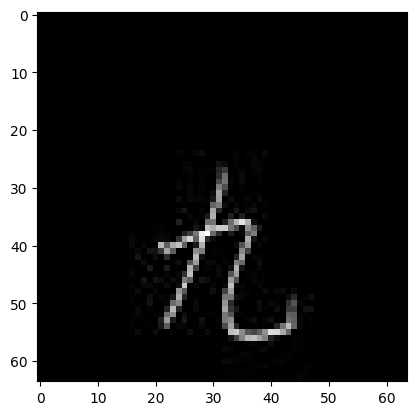

In [27]:
img = cv2.imread('Chinese_MINST_Dataset/data/data/input_1_1_10.jpg', -1)
plt.imshow(img, cmap='gray')
img.shape

In [28]:
path_list = []
label_list = df['value'].to_list()
for i in range(df.shape[0]):
    path = df.iloc[i] # get the ith element of the df
    img_path = f"Chinese_MINST_Dataset/data/data/input_{path['suite_id']}_{path['sample_id']}_{path['code']}.jpg"
    path_list.append(img_path)

X_train, X_test, y_train, y_test = train_test_split(path_list, label_list, test_size=0.2, random_state=42)

In [29]:
def get_image(plist):
    X = []
    for img_path in plist:
        X.append(cv2.imread(img_path, -1).flatten())
    return X

In [30]:
X_train = get_image(X_train)
X_test = get_image(X_test)

### 2. Perform Image Classification with Decision Tree

In [31]:
clf = DecisionTreeClassifier() # instantiate a classifier
clf.fit(X_train, y_train) # fit the classifier, X_train must be 2-d
y_pred = clf.predict(X_test) # make predictions

### 3. Evaluation metrics

Accuracy: |correct| / |total|
Precision (correctness): |TP| / (|TP| + |FP|)
Recall (sensitivity): |TP| / (|TP| + |FN|) 
F1 score: the harmonic average of precision and recall
Confusion matrix: m[i][j], the expected class is i, m[i][j] many instances are classified as j.

In [32]:
print(f'accuracy score: {accuracy_score(y_test, y_pred)}')
# what macro is doing is calculate the score for each label and show the unweighted mean
print(f'precision: {precision_score(y_test, y_pred, average='macro')}')
print(f'recall: {recall_score(y_test, y_pred, average='macro')}')
print(f'f1 score: {f1_score(y_test, y_pred, average='macro')}')
confusion_matrix(y_true=y_test, y_pred=y_pred)

accuracy score: 0.3406666666666667
precision: 0.33511495719006906
recall: 0.3467268679758752
f1 score: 0.3392085842627347


array([[ 91,   0,   0,   6,  16,   3,   6,   5,   1,  11,   1,  20,  12,
          8,   6],
       [  0, 147,   8,   5,   1,   3,   2,   0,   4,   2,   7,   1,   1,
          1,   0],
       [  2,  23,  81,  38,   5,   6,   5,   8,  17,   4,   3,   1,   2,
          9,   2],
       [  1,   9,  28,  61,   4,  13,  15,  12,   8,  12,   3,  11,   8,
         11,   2],
       [ 15,   2,   8,   3,  42,  18,   7,   9,  12,  13,   4,  14,   5,
         16,  26],
       [  7,   1,  17,  14,  10,  51,  15,  13,  12,  14,   4,  16,  10,
         17,   6],
       [  6,   6,   8,  20,  11,   7,  57,  16,  12,  19,  18,   3,   3,
         10,   7],
       [  3,   2,   4,   8,   7,  20,   9,  45,  18,  21,  17,   9,  12,
         19,   7],
       [  1,  11,  15,   7,   2,   5,   9,   7,  95,   9,   9,   4,   4,
          3,   7],
       [ 15,   4,   9,  11,  18,  14,  10,  18,   9,  42,   5,   7,   4,
         11,  24],
       [  3,   6,   3,   2,   1,   3,  10,   9,   4,   6, 104,   1,  26,
       

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.49      0.48       186
           1       0.67      0.81      0.73       182
           2       0.38      0.39      0.39       206
           3       0.28      0.31      0.29       198
           4       0.25      0.22      0.23       194
           5       0.26      0.25      0.25       207
           6       0.27      0.28      0.28       203
           7       0.23      0.22      0.23       201
           8       0.42      0.51      0.46       188
           9       0.20      0.21      0.21       201
          10       0.45      0.55      0.50       189
         100       0.26      0.22      0.24       209
        1000       0.36      0.32      0.34       221
       10000       0.24      0.22      0.23       217
   100000000       0.28      0.22      0.25       198

    accuracy                           0.34      3000
   macro avg       0.34      0.35      0.34      3000
weighted avg       0.33   